<a href="https://colab.research.google.com/github/Wasabibish/Simple-Neural-Net-/blob/main/Test_Neural_nets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
#Importation des librairies 
import pandas as pd
import tensorflow as tf
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

In [6]:
#Importation du dataset
dataset = pd.read_excel('datatest.xlsx')

In [8]:
#Visualiser notre dataset
dataset.head()

,capteur1,capteur4,classe
0,-2.873072,-2.960322,0
1,-2.822573,-2.958599,0
2,-2.748764,-2.630254,0
3,-2.498566,-2.618639,0
4,-2.380298,-2.597404,0


In [16]:
#Diviser en features/target  (Entrees/Sortie)
y = dataset['classe']
X = dataset[['capteur1', 'capteur4']]

In [17]:
#Etre sure que nous avons X (Entree) correspondant aux 2 variables (capteur1 et capteur4)
X.head()

,capteur1,capteur4
0,-2.873072,-2.960322
1,-2.822573,-2.958599
2,-2.748764,-2.630254
3,-2.498566,-2.618639
4,-2.380298,-2.597404


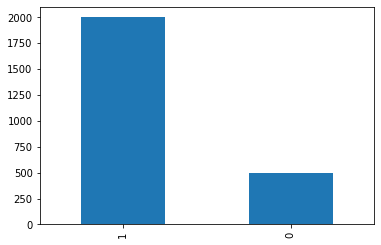

In [65]:
#On voit que nous avons beaucoup plus de 1(non saine) que de 0(saine)
dataset.classe.value_counts().plot(kind='bar')

# Neural Nets avec Sklearn

In [19]:
#Diviser notre dataset en train/test avec un pourcentage 0.66/0.33 pour chacun
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [43]:
#Creer un reseau de neuronnes avec sklearn, avec un nombre diterations = 100
rn_1 = MLPClassifier(random_state=1, max_iter=100).fit(X_train, y_train)

In [44]:
#Calculer l'accuracy(precision) de notre modele, calculer la performance du modele
rn_1.score(X_test, y_test)

0.7890909090909091

Nour remarquons que nous avons une precison de 78%, ce qui est bien mais qui peut etre ameliore, donc on va essayer de diviser notre dataset avec un pourcentage 75/25

In [47]:
#On refait les memes etapes mais cette fois avec test_size=0.25
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
rn_2 = MLPClassifier(random_state=1, max_iter=100).fit(X_train, y_train)
rn_2.score(X_test, y_test)

0.792

Nour remarquons que nous avons une precison de 79%, ce qui est mieux que celle d'avant mais qui peut etre ameliore, donc on va essayer de diviser notre dataset avec un pourcentage 80/20

In [48]:
#On refait les memes etapes mais cette fois avec test_size=0.25
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
rn_3 = MLPClassifier(random_state=1, max_iter=100).fit(X_train, y_train)
rn_3.score(X_test, y_test)

0.8

Nous avons atteint une precision de 80% qui est plutot bien

# Neural Nets avec Tensorflow

In [37]:
#On commence par creer un modele sequentiel
model = tf.keras.Sequential()

#On ajoute les couche une a une

model.add(tf.keras.layers.Dense(
    3, #La couche cache a 3 neurones
    input_dim=2, #2 correspond au nombre d'entree qui est dans notre cas capteur1 et capteur4
    activation='relu' #Fonction d'activation relu 
    ))

#On ajoute la derniere couche (la sortie)
model.add(tf.keras.layers.Dense(
    1, #Nous avons un neurone correspondant a la sortie car nous avons une classification binaire 0/1
    activation='sigmoid' # Sigmoid pour les classificatins binaires
))

In [38]:
#Maintenant que nous avons creer notre modele, nous devons le compiler
model.compile(
    loss='mean_squared_error', #On choisi une fonction d'erreur
    optimizer='adam', #On choisi notre optimisateur
    metrics=['binary_accuracy'] #Metrique de classification
)

In [39]:
model.fit(
    X, #Les entrees
    y, #La sortie
    epochs=10, #Nobre d'iterations
    verbose=1 #Detais lors de l'entrainement
)

Epoch 1/10
79/79 [==============================] - 0s 1ms/step - loss: 0.3285 - binary_accuracy: 0.4584
Epoch 2/10
79/79 [==============================] - 0s 1ms/step - loss: 0.2906 - binary_accuracy: 0.5472
Epoch 3/10
79/79 [==============================] - 0s 1ms/step - loss: 0.2540 - binary_accuracy: 0.6212
Epoch 4/10
79/79 [==============================] - 0s 1ms/step - loss: 0.2210 - binary_accuracy: 0.7584
Epoch 5/10
79/79 [==============================] - 0s 1ms/step - loss: 0.2004 - binary_accuracy: 0.8000
Epoch 6/10
79/79 [==============================] - 0s 1ms/step - loss: 0.1903 - binary_accuracy: 0.8000
Epoch 7/10
79/79 [==============================] - 0s 1ms/step - loss: 0.1842 - binary_accuracy: 0.8000
Epoch 8/10
79/79 [==============================] - 0s 1ms/step - loss: 0.1803 - binary_accuracy: 0.8000
Epoch 9/10
79/79 [==============================] - 0s 1ms/step - loss: 0.1775 - binary_accuracy: 0.8000
Epoch 10/10
79/79 [==============================] - 0s

Nous remarquons que nous avons atteint une limite de 80% de precision comme avant

# Ameliorations ?

On peut ameliorer notre modele de differentes facons, soit on essayant plusieurs parametres(Nombre de couche/neurones, les focntions, nombre d'iterations etc), ou en augmentant notre base de donneees (de telle sorte a avoir 50/50 de chaque classe (0/1)